In [341]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [342]:
df=pd.read_csv("dataset/train.csv")

# Data Analysis

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

In [344]:
columns=df.columns
columns

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')

In [345]:
df.shape

(30000, 24)

In [346]:
# df.dropna(subset = [ 'Gender', 'Income (USD)', 'Current Loan Expenses (USD)', 'Dependents', 'Credit Score',
#         'Property Age','Loan Sanction Amount (USD)'], inplace=True)

df[['Income (USD)', 'Credit Score','Co-Applicant','Current Loan Expenses (USD)','Loan Sanction Amount (USD)']] = df[['Income (USD)','Credit Score','Co-Applicant','Current Loan Expenses (USD)','Loan Sanction Amount (USD)']].fillna(0)
#df = df.fillna(0)
df = df.replace("?", 0)
df = df.replace("1", 1)
df = df.replace("0", 0)

In [347]:
df.shape

(30000, 24)

In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 30000 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  30000 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

In [349]:
df["Gender"]=df["Gender"].astype("category")
df["Gender_cat"]=df["Gender"].cat.codes

df["Income Stability"]=df["Income Stability"].astype("category")
df["IncomeStability_cat"]=df["Income Stability"].cat.codes

df["Profession"]=df["Profession"].astype("category")
df["Profession_cat"]=df["Profession"].cat.codes

df["Type of Employment"]=df["Type of Employment"].astype("category")
df["TypeofEmployment_cat"]=df["Type of Employment"].cat.codes

df["Location"]=df["Location"].astype("category")
df["Location_cat"]=df["Location"].cat.codes

df["Expense Type 1"]=df["Expense Type 1"].astype("category")
df["ExpenseType1_cat"]=df["Expense Type 1"].cat.codes

df["Expense Type 2"]=df["Expense Type 2"].astype("category")
df["ExpenseType2_cat"]=df["Expense Type 2"].cat.codes

df["Has Active Credit Card"]=df["Has Active Credit Card"].astype("category")
df["HasActiveCreditCard_cat"]=df["Has Active Credit Card"].cat.codes

df["Property Location"]=df["Property Location"].astype("category")
df["PropertyLocation_cat"]=df["Property Location"].cat.codes


In [350]:
Y=df[["Loan Sanction Amount (USD)"]]

In [351]:
X = df.drop(['Customer ID', 'Name', 'Property ID','Loan Sanction Amount (USD)','Gender','Income Stability', 'Profession',
       'Type of Employment','Dependents','Location','Expense Type 1', 'Expense Type 2','Has Active Credit Card','Property Location'],  axis=1)

In [352]:
columns=X.columns
columns

Index(['Age', 'Income (USD)', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Credit Score', 'No. of Defaults',
       'Property Age', 'Property Type', 'Co-Applicant', 'Property Price',
       'Gender_cat', 'IncomeStability_cat', 'Profession_cat',
       'TypeofEmployment_cat', 'Location_cat', 'ExpenseType1_cat',
       'ExpenseType2_cat', 'HasActiveCreditCard_cat', 'PropertyLocation_cat'],
      dtype='object')

In [353]:
X.head()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Credit Score,No. of Defaults,Property Age,Property Type,Co-Applicant,Property Price,Gender_cat,IncomeStability_cat,Profession_cat,TypeofEmployment_cat,Location_cat,ExpenseType1_cat,ExpenseType2_cat,HasActiveCreditCard_cat,PropertyLocation_cat
0,56,1933.05,72809.58,241.08,809.44,0,1933.05,4,1,119933.46,0,1,7,14,1,0,0,-1,0
1,32,4952.91,46837.47,495.81,780.40,0,4952.91,2,1,54791.00,1,1,7,-1,1,0,1,2,0
2,65,988.19,45593.04,171.95,833.15,0,988.19,2,0,72440.58,0,0,3,-1,1,0,1,2,2
3,65,0.00,80057.92,298.54,832.70,1,NaN,2,1,121441.51,0,0,3,-1,0,0,1,2,1
4,31,2614.77,113858.89,491.41,745.55,1,2614.77,4,1,208567.91,0,1,7,6,1,0,1,0,1


In [354]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          30000 non-null  int64  
 1   Income (USD)                 30000 non-null  float64
 2   Loan Amount Request (USD)    30000 non-null  float64
 3   Current Loan Expenses (USD)  30000 non-null  float64
 4   Credit Score                 30000 non-null  float64
 5   No. of Defaults              30000 non-null  int64  
 6   Property Age                 25150 non-null  float64
 7   Property Type                30000 non-null  int64  
 8   Co-Applicant                 30000 non-null  int64  
 9   Property Price               30000 non-null  float64
 10  Gender_cat                   30000 non-null  int8   
 11  IncomeStability_cat          30000 non-null  int8   
 12  Profession_cat               30000 non-null  int8   
 13  TypeofEmployment

In [355]:
X.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Credit Score,No. of Defaults,Property Age,Property Type,Co-Applicant,Property Price,Gender_cat,IncomeStability_cat,Profession_cat,TypeofEmployment_cat,Location_cat,ExpenseType1_cat,ExpenseType2_cat,HasActiveCreditCard_cat,PropertyLocation_cat
count,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,2.515000e+04,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,40.092300,2.229324e+03,88826.333855,398.638172,697.884554,0.193933,2.631119e+03,2.460067,-4.743867,1.317597e+05,0.500000,0.802267,4.804900,5.711067,0.925367,0.359533,0.672667,0.876467,0.948767
std,16.045129,1.041125e+04,59536.949605,243.736226,184.999181,0.395384,1.132268e+04,1.118562,74.614593,9.354955e+04,0.503529,0.520427,2.628992,5.436031,0.525045,0.479872,0.469248,0.908754,0.828713
min,18.000000,0.000000e+00,6048.240000,-999.000000,0.000000,0.000000,3.777000e+02,1.000000,-999.000000,-9.990000e+02,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,25.000000,1.281305e+03,41177.755000,245.607500,670.490000,0.000000,1.650450e+03,1.000000,1.000000,6.057216e+04,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,2.002225e+03,75128.075000,373.845000,733.320000,0.000000,2.223250e+03,2.000000,1.000000,1.099936e+05,1.000000,1.000000,7.000000,6.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,55.000000,2.869142e+03,119964.605000,520.102500,795.140000,0.000000,3.091407e+03,3.000000,1.000000,1.788807e+05,1.000000,1.000000,7.000000,10.000000,1.000000,1.000000,1.000000,2.000000,2.000000
max,65.000000,1.777460e+06,621497.820000,3840.880000,896.260000,1.000000,1.777460e+06,4.000000,1.000000,1.077967e+06,1.000000,1.000000,7.000000,17.000000,2.000000,1.000000,1.000000,2.000000,2.000000


In [356]:
corr=df.corr(method="pearson")
corr

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,...,Loan Sanction Amount (USD),Gender_cat,IncomeStability_cat,Profession_cat,TypeofEmployment_cat,Location_cat,ExpenseType1_cat,ExpenseType2_cat,HasActiveCreditCard_cat,PropertyLocation_cat
Age,1.000000,-0.009874,-0.010450,-0.023820,-0.083454,0.046136,0.003573,-0.012358,-0.010341,0.002196,...,0.008446,0.004900,-0.242412,-0.092856,-0.183790,-0.016779,-0.044729,0.029966,0.009671,0.005480
Income (USD),-0.009874,1.000000,0.044879,0.049680,0.004567,0.012165,-0.002482,-0.007238,1.000000,0.009083,...,0.027384,0.005868,0.015194,-0.012067,0.005576,0.025694,0.018774,0.004422,-0.003699,0.000296
Loan Amount Request (USD),-0.010450,0.044879,1.000000,0.675534,0.040952,0.075279,0.000088,-0.008426,0.049976,0.003802,...,0.717078,0.000273,0.009244,-0.085669,-0.023440,0.103902,0.096134,-0.023596,-0.043619,0.004961
Current Loan Expenses (USD),-0.023820,0.049680,0.675534,1.000000,0.044716,0.053315,0.002371,-0.014714,0.054307,0.014663,...,0.472475,-0.008067,0.028141,-0.081619,0.002544,0.119564,0.108167,0.016194,-0.004567,0.000207
Dependents,-0.083454,0.004567,0.040952,0.044716,1.000000,-0.026813,0.009108,0.002471,0.005082,-0.009303,...,0.009380,-0.005004,0.095189,0.068633,0.058183,-0.031302,0.112899,0.037349,0.024828,-0.000091
Credit Score,0.046136,0.012165,0.075279,0.053315,-0.026813,1.000000,0.000849,-0.005479,0.007433,0.011039,...,0.106239,-0.000011,-0.024005,-0.052205,-0.061380,0.047721,-0.014585,0.028098,-0.004378,0.007439
No. of Defaults,0.003573,-0.002482,0.000088,0.002371,0.009108,0.000849,1.000000,-0.001282,-0.002093,0.000477,...,-0.003955,0.000167,0.000553,0.005487,0.000884,-0.011848,0.006893,0.001334,-0.004665,0.003874
Property ID,-0.012358,-0.007238,-0.008426,-0.014714,0.002471,-0.005479,-0.001282,1.000000,-0.008075,0.008658,...,-0.009822,-0.003546,0.004464,-0.001067,0.009969,0.002262,-0.000366,-0.003126,0.007391,-0.026811
Property Age,-0.010341,1.000000,0.049976,0.054307,0.005082,0.007433,-0.002093,-0.008075,1.000000,0.009798,...,0.037639,0.006021,0.010472,-0.013549,0.005150,0.028474,0.020591,0.005182,-0.004170,-0.000179
Property Type,0.002196,0.009083,0.003802,0.014663,-0.009303,0.011039,0.000477,0.008658,0.009798,1.000000,...,0.001916,0.002367,-0.000967,0.002990,-0.021502,-0.002606,0.009919,0.005897,0.008297,-0.027901


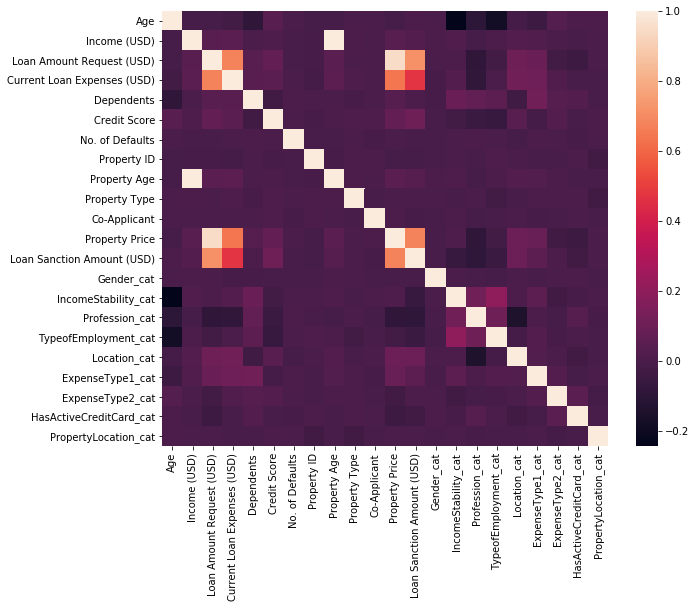

In [357]:
plt.subplots(figsize=(10,8))
sns.heatmap(df.corr())

In [358]:
X_mod = df.drop(['Customer ID', 'Name', 'Property ID','Gender','Income Stability', 'Profession',
       'Type of Employment', 'Location','Expense Type 1', 'Expense Type 2','Has Active Credit Card','Property Location'],  axis=1)

In [359]:
corr=X_mod.corr(method="pearson")
corr

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Age,Property Type,Co-Applicant,...,Loan Sanction Amount (USD),Gender_cat,IncomeStability_cat,Profession_cat,TypeofEmployment_cat,Location_cat,ExpenseType1_cat,ExpenseType2_cat,HasActiveCreditCard_cat,PropertyLocation_cat
Age,1.000000,-0.009874,-0.010450,-0.023820,-0.083454,0.046136,0.003573,-0.010341,0.002196,0.000632,...,0.008446,0.004900,-0.242412,-0.092856,-0.183790,-0.016779,-0.044729,0.029966,0.009671,0.005480
Income (USD),-0.009874,1.000000,0.044879,0.049680,0.004567,0.012165,-0.002482,1.000000,0.009083,0.002328,...,0.027384,0.005868,0.015194,-0.012067,0.005576,0.025694,0.018774,0.004422,-0.003699,0.000296
Loan Amount Request (USD),-0.010450,0.044879,1.000000,0.675534,0.040952,0.075279,0.000088,0.049976,0.003802,0.001864,...,0.717078,0.000273,0.009244,-0.085669,-0.023440,0.103902,0.096134,-0.023596,-0.043619,0.004961
Current Loan Expenses (USD),-0.023820,0.049680,0.675534,1.000000,0.044716,0.053315,0.002371,0.054307,0.014663,0.002124,...,0.472475,-0.008067,0.028141,-0.081619,0.002544,0.119564,0.108167,0.016194,-0.004567,0.000207
Dependents,-0.083454,0.004567,0.040952,0.044716,1.000000,-0.026813,0.009108,0.005082,-0.009303,0.002796,...,0.009380,-0.005004,0.095189,0.068633,0.058183,-0.031302,0.112899,0.037349,0.024828,-0.000091
Credit Score,0.046136,0.012165,0.075279,0.053315,-0.026813,1.000000,0.000849,0.007433,0.011039,0.011279,...,0.106239,-0.000011,-0.024005,-0.052205,-0.061380,0.047721,-0.014585,0.028098,-0.004378,0.007439
No. of Defaults,0.003573,-0.002482,0.000088,0.002371,0.009108,0.000849,1.000000,-0.002093,0.000477,-0.008191,...,-0.003955,0.000167,0.000553,0.005487,0.000884,-0.011848,0.006893,0.001334,-0.004665,0.003874
Property Age,-0.010341,1.000000,0.049976,0.054307,0.005082,0.007433,-0.002093,1.000000,0.009798,0.000472,...,0.037639,0.006021,0.010472,-0.013549,0.005150,0.028474,0.020591,0.005182,-0.004170,-0.000179
Property Type,0.002196,0.009083,0.003802,0.014663,-0.009303,0.011039,0.000477,0.009798,1.000000,-0.001105,...,0.001916,0.002367,-0.000967,0.002990,-0.021502,-0.002606,0.009919,0.005897,0.008297,-0.027901
Co-Applicant,0.000632,0.002328,0.001864,0.002124,0.002796,0.011279,-0.008191,0.000472,-0.001105,1.000000,...,-0.006372,-0.000861,0.006231,-0.010105,-0.000846,0.003838,-0.005124,-0.001902,0.001561,-0.003047


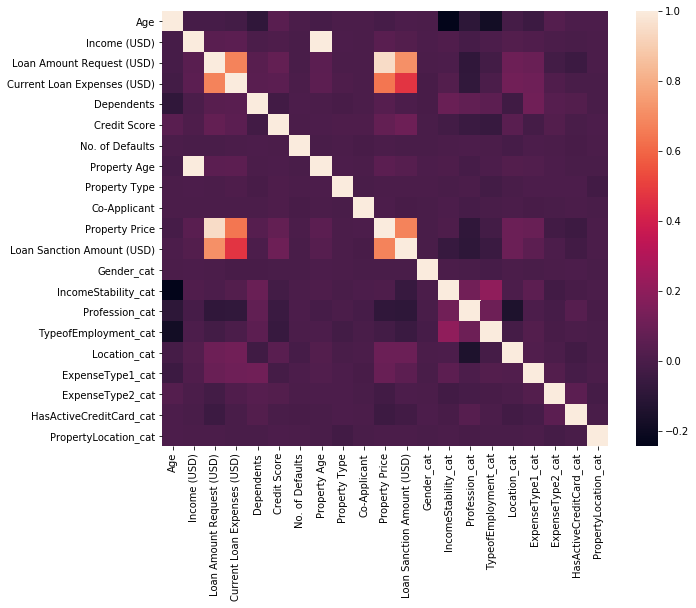

In [360]:
plt.subplots(figsize=(10,8))
sns.heatmap(corr)

In [361]:
columns = np.full((corr.shape[0],), True, dtype=bool)
print(columns)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:       # removing anything above 0.9
            if columns[j]:
                columns[j] = False
selected_columns = X_mod.columns[columns]
print(selected_columns)
X_mod = X_mod[selected_columns]

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]
Index(['Age', 'Income (USD)', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Property Type', 'Co-Applicant',
       'Loan Sanction Amount (USD)', 'Gender_cat', 'IncomeStability_cat',
       'Profession_cat', 'TypeofEmployment_cat', 'Location_cat',
       'ExpenseType1_cat', 'ExpenseType2_cat', 'HasActiveCreditCard_cat',
       'PropertyLocation_cat'],
      dtype='object')


In [362]:
X_mod.shape

(30000, 19)

In [363]:
X_mod = X_mod.drop(['Loan Sanction Amount (USD)','Dependents'],  axis=1) # droping target column

In [364]:
X_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          30000 non-null  int64  
 1   Income (USD)                 30000 non-null  float64
 2   Loan Amount Request (USD)    30000 non-null  float64
 3   Current Loan Expenses (USD)  30000 non-null  float64
 4   Credit Score                 30000 non-null  float64
 5   No. of Defaults              30000 non-null  int64  
 6   Property Type                30000 non-null  int64  
 7   Co-Applicant                 30000 non-null  int64  
 8   Gender_cat                   30000 non-null  int8   
 9   IncomeStability_cat          30000 non-null  int8   
 10  Profession_cat               30000 non-null  int8   
 11  TypeofEmployment_cat         30000 non-null  int8   
 12  Location_cat                 30000 non-null  int8   
 13  ExpenseType1_cat

In [365]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Loan Sanction Amount (USD)  30000 non-null  float64
dtypes: float64(1)
memory usage: 234.5 KB


In [366]:
x=X_mod.iloc[:,:].values   # inputs for backwardElimination
y=Y.iloc[:,0].values

In [367]:
modified_columns=selected_columns # removing the target columne name
modified_columns = np.delete(modified_columns, 9)
modified_columns

Index(['Age', 'Income (USD)', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Property Type', 'Co-Applicant', 'Gender_cat',
       'IncomeStability_cat', 'Profession_cat', 'TypeofEmployment_cat',
       'Location_cat', 'ExpenseType1_cat', 'ExpenseType2_cat',
       'HasActiveCreditCard_cat', 'PropertyLocation_cat'],
      dtype='object')

In [368]:
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(x,y, SL, modified_columns)

In [369]:
selected_columns

Index(['Age', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Dependents', 'No. of Defaults', 'Gender_cat', 'IncomeStability_cat',
       'Profession_cat', 'TypeofEmployment_cat', 'Location_cat',
       'ExpenseType1_cat', 'PropertyLocation_cat'],
      dtype='object')

### statsmodel package can also give us some great insight and summary statistics including p-value
The statsmodel can actually perform the regression modeling for us , but here I am mainly using it to help determine which variable I should focus on for my Simple Linear Regression (one independent variable) and get a feel of which values are statistically significant. There are techniques when dealing with Multiple Linear Regression (many variable) to narrow down to the most significant features/variables usiung Step Wise Regression which include techniques such as Forward Selection and Backward Elimination.

In [370]:
import statsmodels.api as sml
from statsmodels import tools
X_inp=X_mod[['Age', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)', 'Credit Score', 'No. of Defaults', 'Property Type',
       'Co-Applicant', 'Gender_cat', 'IncomeStability_cat', 'Profession_cat',
       'TypeofEmployment_cat', 'Location_cat', 'ExpenseType1_cat',
       'PropertyLocation_cat']]
X_new = tools.add_constant(X_inp)

regressor_OLS = sml.OLS(endog = Y,exog =  X_new).fit()

regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Loan Sanction Amount (USD)   R-squared:                       0.523
Model:                                    OLS   Adj. R-squared:                  0.523
Method:                         Least Squares   F-statistic:                     2347.
Date:                        Sat, 26 Jun 2021   Prob (F-statistic):               0.00
Time:                                18:13:29   Log-Likelihood:            -3.5497e+05
No. Observations:                       30000   AIC:                         7.100e+05
Df Residuals:                           29985   BIC:                         7.101e+05
Df Model:                                  14                                         
Covariance Type:                    nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                       -5876.4109   1290.149     -4.555      0.000   -8405.159   -3347.663
Age                           -18.0944     12.518     -1.446      0.148     -42.630       6.441
Loan Amount Request (USD)       0.5871      0.004    133.545      0.000       0.579       0.596
Current Loan Expenses (USD)    -4.2573      1.076     -3.957      0.000      -6.366      -2.149
Credit Score                   12.6876      1.047     12.120      0.000      10.636      14.740
No. of Defaults              -437.2663    486.502     -0.899      0.369   -1390.831     516.299
Property Type                 -55.4007    172.093     -0.322      0.748    -392.710     281.909
Co-Applicant                   -5.2911      2.578     -2.052      0.040     -10.344      -0.238
Gender_cat                   -248.0759    382.013     -0.649      0.516    -996.838     500.686
IncomeStability_cat         -5701.1234    388.573    -14.672      0.000   -6462.744   -4939.503
Profession_cat               -312.5351     75.112     -4.161      0.000    -459.759    -165.312
TypeofEmployment_cat         -137.7328     36.705     -3.752      0.000    -209.676     -65.790
Location_cat                 2078.5434    372.978      5.573      0.000    1347.490    2809.597
ExpenseType1_cat             -786.7738    404.284     -1.946      0.052   -1579.187       5.639
PropertyLocation_cat          -61.1140    232.190     -0.263      0.792    -516.217     393.989
==============================================================================
Omnibus:                    10350.688   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37825.707
Skew:                          -1.727   Prob(JB):                         0.00
Kurtosis:                       7.282   Cond. No.                     7.24e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [371]:
X_new.columns

Index(['const', 'Age', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Credit Score', 'No. of Defaults',
       'Property Type', 'Co-Applicant', 'Gender_cat', 'IncomeStability_cat',
       'Profession_cat', 'TypeofEmployment_cat', 'Location_cat',
       'ExpenseType1_cat', 'PropertyLocation_cat'],
      dtype='object')

In [372]:
# x_opt = X_new[['const', 'Age', 'Loan Amount Request (USD)',
#        'Current Loan Expenses (USD)', 'Credit Score',
#        'No. of Defaults', 'Property Type', 'Co-Applicant', 'Gender_cat',
#        'IncomeStability_cat', 'Profession_cat', 'TypeofEmployment_cat',
#        'Location_cat', 'ExpenseType1_cat', 'PropertyLocation_cat']]    # removing dependents as it have high p
# ols = sml.OLS(endog = Y, exog = x_opt).fit()
# ols.summary()


In [373]:
x_opt = X_new[['const', 'Age', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Credit Score',
       'No. of Defaults', 'Property Type', 'Co-Applicant', 'Gender_cat',
       'IncomeStability_cat', 'TypeofEmployment_cat',
       'Location_cat', 'ExpenseType1_cat', 'PropertyLocation_cat']]    # removing Profession_cat as it have high p
ols = sml.OLS(endog = Y, exog = x_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Loan Sanction Amount (USD)   R-squared:                       0.523
Model:                                    OLS   Adj. R-squared:                  0.522
Method:                         Least Squares   F-statistic:                     2525.
Date:                        Sat, 26 Jun 2021   Prob (F-statistic):               0.00
Time:                                18:13:33   Log-Likelihood:            -3.5498e+05
No. Observations:                       30000   AIC:                         7.100e+05
Df Residuals:                           29986   BIC:                         7.101e+05
Df Model:                                  13                                         
Covariance Type:                    nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                       -7715.8859   1212.372     -6.364      0.000   -1.01e+04   -5339.585
Age                           -15.0132     12.499     -1.201      0.230     -39.512       9.486
Loan Amount Request (USD)       0.5877      0.004    133.713      0.000       0.579       0.596
Current Loan Expenses (USD)    -4.1225      1.076     -3.833      0.000      -6.231      -2.014
Credit Score                   12.8254      1.047     12.254      0.000      10.774      14.877
No. of Defaults              -445.6334    486.630     -0.916      0.360   -1399.450     508.183
Property Type                 -59.2307    172.137     -0.344      0.731    -396.627     278.166
Co-Applicant                   -5.1867      2.579     -2.011      0.044     -10.241      -0.132
Gender_cat                   -244.3084    382.116     -0.639      0.523    -993.272     504.655
IncomeStability_cat         -5841.5800    387.210    -15.086      0.000   -6600.528   -5082.633
TypeofEmployment_cat         -148.4081     36.625     -4.052      0.000    -220.195     -76.621
Location_cat                 2287.7160    369.675      6.188      0.000    1563.137    3012.295
ExpenseType1_cat             -799.1962    404.382     -1.976      0.048   -1591.803      -6.589
PropertyLocation_cat          -54.8101    232.249     -0.236      0.813    -510.027     400.407
==============================================================================
Omnibus:                    10340.040   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37727.499
Skew:                          -1.725   Prob(JB):                         0.00
Kurtosis:                       7.275   Cond. No.                     6.82e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [374]:
x_opt = X_new[['const', 'Age', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Credit Score',
       'No. of Defaults', 'Property Type', 'Co-Applicant', 'Gender_cat',
       'IncomeStability_cat', 'TypeofEmployment_cat',
               'ExpenseType1_cat', 'PropertyLocation_cat']]    # removing Location_cat as it have high p
ols = sml.OLS(endog = Y, exog = x_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Loan Sanction Amount (USD)   R-squared:                       0.522
Model:                                    OLS   Adj. R-squared:                  0.522
Method:                         Least Squares   F-statistic:                     2728.
Date:                        Sat, 26 Jun 2021   Prob (F-statistic):               0.00
Time:                                18:13:33   Log-Likelihood:            -3.5500e+05
No. Observations:                       30000   AIC:                         7.100e+05
Df Residuals:                           29987   BIC:                         7.101e+05
Df Model:                                  12                                         
Covariance Type:                    nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                       -5948.7777   1178.997     -5.046      0.000   -8259.662   -3637.893
Age                           -16.3596     12.505     -1.308      0.191     -40.870       8.151
Loan Amount Request (USD)       0.5885      0.004    133.862      0.000       0.580       0.597
Current Loan Expenses (USD)    -3.6789      1.074     -3.426      0.001      -5.784      -1.574
Credit Score                   13.0856      1.046     12.505      0.000      11.035      15.137
No. of Defaults              -482.2571    486.897     -0.990      0.322   -1436.596     472.081
Property Type                 -64.5243    172.242     -0.375      0.708    -402.126     273.078
Co-Applicant                   -5.1376      2.580     -1.991      0.046     -10.195      -0.080
Gender_cat                   -234.8421    382.350     -0.614      0.539    -984.265     514.581
IncomeStability_cat         -5835.3247    387.449    -15.061      0.000   -6594.741   -5075.908
TypeofEmployment_cat         -152.0218     36.643     -4.149      0.000    -223.844     -80.200
ExpenseType1_cat             -776.4270    404.617     -1.919      0.055   -1569.494      16.640
PropertyLocation_cat          -55.5704    232.393     -0.239      0.811    -511.071     399.930
==============================================================================
Omnibus:                    10315.991   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37479.554
Skew:                          -1.723   Prob(JB):                         0.00
Kurtosis:                       7.256   Cond. No.                     6.62e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [375]:
x_opt = X_new[['const', 'Age', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Credit Score',
       'No. of Defaults', 'Property Type', 'Co-Applicant', 'Gender_cat',
       'IncomeStability_cat', 'TypeofEmployment_cat','PropertyLocation_cat']]    # removing ExpenseType1_cat as it have high p
ols = sml.OLS(endog = Y, exog = x_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Loan Sanction Amount (USD)   R-squared:                       0.522
Model:                                    OLS   Adj. R-squared:                  0.522
Method:                         Least Squares   F-statistic:                     2976.
Date:                        Sat, 26 Jun 2021   Prob (F-statistic):               0.00
Time:                                18:13:34   Log-Likelihood:            -3.5500e+05
No. Observations:                       30000   AIC:                         7.100e+05
Df Residuals:                           29988   BIC:                         7.101e+05
Df Model:                                  11                                         
Covariance Type:                    nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                       -6170.7846   1173.359     -5.259      0.000   -8470.619   -3870.951
Age                           -15.6858     12.501     -1.255      0.210     -40.188       8.816
Loan Amount Request (USD)       0.5882      0.004    133.868      0.000       0.580       0.597
Current Loan Expenses (USD)    -3.7956      1.072     -3.540      0.000      -5.897      -1.694
Credit Score                   13.1241      1.046     12.544      0.000      11.073      15.175
No. of Defaults              -488.6081    486.907     -1.003      0.316   -1442.967     465.751
Property Type                 -67.5913    172.242     -0.392      0.695    -405.194     270.011
Co-Applicant                   -5.1110      2.580     -1.981      0.048     -10.169      -0.053
Gender_cat                   -235.2169    382.367     -0.615      0.538    -984.673     514.239
IncomeStability_cat         -5866.7877    387.119    -15.155      0.000   -6625.558   -5108.017
TypeofEmployment_cat         -152.7430     36.643     -4.168      0.000    -224.565     -80.921
PropertyLocation_cat          -56.3458    232.403     -0.242      0.808    -511.866     399.174
==============================================================================
Omnibus:                    10310.064   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37417.082
Skew:                          -1.722   Prob(JB):                         0.00
Kurtosis:                       7.251   Cond. No.                     6.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [376]:
x_opt = X_new[['const', 'Age', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Credit Score',
       'No. of Defaults', 'Property Type', 'Co-Applicant', 'Gender_cat',
       'IncomeStability_cat', 'TypeofEmployment_cat']]    # removing PropertyLocation_cat as it have high p
ols = sml.OLS(endog = Y, exog = x_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Loan Sanction Amount (USD)   R-squared:                       0.522
Model:                                    OLS   Adj. R-squared:                  0.522
Method:                         Least Squares   F-statistic:                     3274.
Date:                        Sat, 26 Jun 2021   Prob (F-statistic):               0.00
Time:                                18:13:34   Log-Likelihood:            -3.5500e+05
No. Observations:                       30000   AIC:                         7.100e+05
Df Residuals:                           29989   BIC:                         7.101e+05
Df Model:                                  10                                         
Covariance Type:                    nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                       -6224.9080   1151.909     -5.404      0.000   -8482.700   -3967.116
Age                           -15.7019     12.500     -1.256      0.209     -40.203       8.799
Loan Amount Request (USD)       0.5882      0.004    133.871      0.000       0.580       0.597
Current Loan Expenses (USD)    -3.7946      1.072     -3.539      0.000      -5.896      -1.693
Credit Score                   13.1223      1.046     12.542      0.000      11.072      15.173
No. of Defaults              -489.0625    486.896     -1.004      0.315   -1443.400     465.275
Property Type                 -66.4226    172.172     -0.386      0.700    -403.888     271.042
Co-Applicant                   -5.1090      2.580     -1.980      0.048     -10.166      -0.052
Gender_cat                   -235.0687    382.361     -0.615      0.539    -984.512     514.375
IncomeStability_cat         -5867.0852    387.111    -15.156      0.000   -6625.840   -5108.331
TypeofEmployment_cat         -152.7225     36.642     -4.168      0.000    -224.543     -80.902
==============================================================================
Omnibus:                    10309.647   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37411.987
Skew:                          -1.722   Prob(JB):                         0.00
Kurtosis:                       7.250   Cond. No.                     6.47e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Linear Regression

In [377]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# X_inp=X_mod[['Age', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
#        'Dependents', 'Credit Score', 'No. of Defaults', 'Property Type',
#        'Co-Applicant', 'Gender_cat', 'IncomeStability_cat', 'Profession_cat',
#        'TypeofEmployment_cat', 'Location_cat', 'ExpenseType1_cat',
#        'PropertyLocation_cat']]
X_inp=X_mod[['Age', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Credit Score',
       'No. of Defaults', 'Property Type', 'Co-Applicant', 'Gender_cat',
       'IncomeStability_cat', 'TypeofEmployment_cat']]
lr = LinearRegression()
#sc_x = StandardScaler()
#X_new = sc_x.fit_transform(X_inp)

In [378]:
#mlr.fit(X_new,Y)
lr.fit(X_inp,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [379]:
lr.score(X_inp,Y)

0.5218913862711929

In [380]:
result=lr.predict(X_inp)

In [381]:
# Regression coefficients

print('Coefficients are:\n',lr.coef_)

# Intecept

print('\nIntercept : ',lr.intercept_)

# Mean Squared Erroe

print("Mean squared error: %.2f" % mean_squared_error(Y, result))

Coefficients are:
 [[-1.57018638e+01  5.88219071e-01 -3.79464509e+00  1.31222525e+01
  -4.89062450e+02 -6.64225553e+01 -5.10903246e+00 -2.35068735e+02
  -5.86708521e+03 -1.52722492e+02]]

Intercept :  [-6224.90797968]
Mean squared error: 1111262384.41


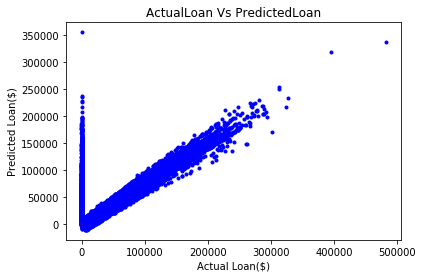

In [382]:
plt.title('ActualLoan Vs PredictedLoan')
plt.scatter(Y,result,c='b',marker='.',s=36)
plt.plot([0, 600], [0, 600], '--r')
plt.xlabel('Actual Loan($)')
plt.ylabel('Predicted Loan($)')
plt.show()

In [383]:
X_inp.shape

(30000, 10)

In [384]:
Y.shape

(30000, 1)

# Some More Data Analysis

In [70]:
df=pd.read_csv("dataset/train.csv")

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

In [72]:
df.dropna(subset=['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)'],inplace=True)

In [73]:
columns=df.columns
columns

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')

In [74]:
df=df.drop(['Customer ID', 'Name', 'Property ID'],  axis=1)

In [75]:
df=pd.get_dummies(df,columns=['Gender','Income Stability', 'Profession', 'Type of Employment', 'Location', 'Expense Type 1', 'Expense Type 2','Has Active Credit Card','Property Location'])

In [76]:
df.head()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Age,Property Type,Co-Applicant,...,Expense Type 1_N,Expense Type 1_Y,Expense Type 2_N,Expense Type 2_Y,Has Active Credit Card_Active,Has Active Credit Card_Inactive,Has Active Credit Card_Unpossessed,Property Location_Rural,Property Location_Semi-Urban,Property Location_Urban
5,60,1234.92,34434.72,181.48,2.0,684.12,1,1234.92,2,1,...,1,0,1,0,0,1,0,1,0,0
6,43,2361.56,152561.34,697.67,2.0,637.29,0,2361.56,1,1,...,0,1,0,1,0,0,1,0,1,0
8,38,1296.07,35141.99,155.95,3.0,705.29,1,1296.07,4,1,...,1,0,0,1,1,0,0,1,0,0
9,18,1546.17,42091.29,500.20,2.0,613.24,0,1546.17,2,1,...,1,0,1,0,0,0,1,0,0,1
10,18,2416.86,25765.72,140.02,1.0,652.41,0,2416.86,2,1,...,1,0,0,1,1,0,0,1,0,0


In [77]:
df.columns

Index(['Age', 'Income (USD)', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Property Age', 'Property Type', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)', 'Gender_F', 'Gender_M',
       'Income Stability_Low', 'Profession_Commercial associate',
       'Profession_State servant', 'Profession_Working',
       'Type of Employment_Accountants', 'Type of Employment_Cleaning staff',
       'Type of Employment_Cooking staff', 'Type of Employment_Core staff',
       'Type of Employment_Drivers', 'Type of Employment_HR staff',
       'Type of Employment_High skill tech staff',
       'Type of Employment_IT staff', 'Type of Employment_Laborers',
       'Type of Employment_Low-skill Laborers', 'Type of Employment_Managers',
       'Type of Employment_Medicine staff',
       'Type of Employment_Private service staff',
       'Type of Employment_Realty agents', 'Type of Employment_Sales staff',
   

In [78]:
corr=df.corr(method="pearson")

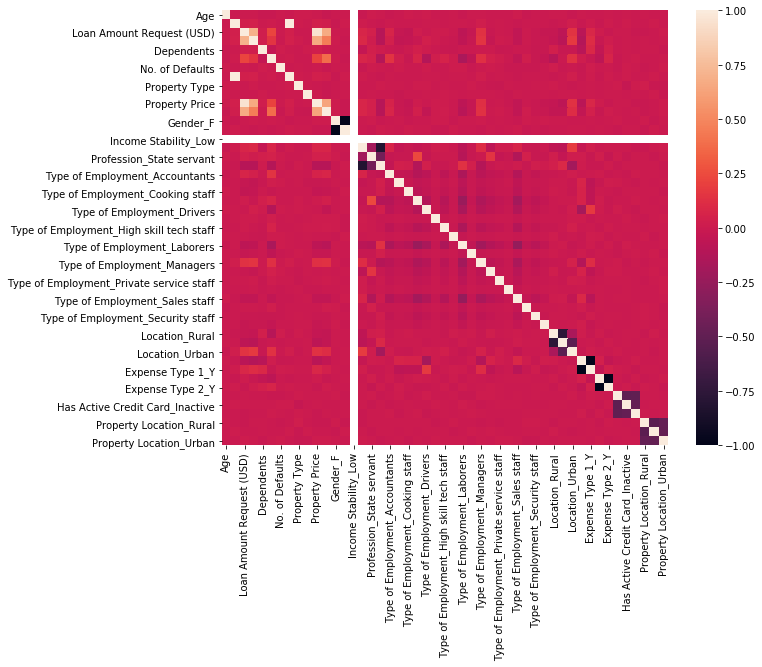

In [80]:
plt.subplots(figsize=(10,8))
sns.heatmap(corr)

In [82]:
Y=df[["Loan Sanction Amount (USD)"]]

In [87]:
#X=df.drop(['Loan Sanction Amount (USD)'],  axis=1)
X=df

In [88]:
columns = np.full((corr.shape[0],), True, dtype=bool)
print(columns)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:       # removing anything above 0.9
            if columns[j]:
                columns[j] = False
selected_columns = X.columns[columns]
print(selected_columns)
X= X[selected_columns]

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]
Index(['Age', 'Income (USD)', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Property Type', 'Co-Applicant',
       'Loan Sanction Amount (USD)', 'Gender_F', 'Gender_M',
       'Income Stability_Low', 'Profession_Commercial associate',
       'Profession_State servant', 'Profession_Working',
       'Type of Employment_Accountants', 'Type of Employment_Cleaning staff',
       'Type of Employment_Cooking staff', 'Type of Employment_Core staff',
       'Type of Employment_Drivers', 'Type of Employment_HR staff',
       'Type of Employment_High skill tech staff',
       'Type of Employment_IT staff', 'Type of Employment

In [89]:
X= X.drop(['Loan Sanction Amount (USD)'],  axis=1)

In [91]:
x=X.iloc[:,:].values   # inputs for backwardElimination
y=Y.iloc[:,0].values

In [92]:
modified_columns=selected_columns # removing the target columne name
modified_columns = np.delete(modified_columns, 9)
modified_columns

Index(['Age', 'Income (USD)', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Property Type', 'Co-Applicant', 'Gender_F',
       'Gender_M', 'Income Stability_Low', 'Profession_Commercial associate',
       'Profession_State servant', 'Profession_Working',
       'Type of Employment_Accountants', 'Type of Employment_Cleaning staff',
       'Type of Employment_Cooking staff', 'Type of Employment_Core staff',
       'Type of Employment_Drivers', 'Type of Employment_HR staff',
       'Type of Employment_High skill tech staff',
       'Type of Employment_IT staff', 'Type of Employment_Laborers',
       'Type of Employment_Low-skill Laborers', 'Type of Employment_Managers',
       'Type of Employment_Medicine staff',
       'Type of Employment_Private service staff',
       'Type of Employment_Realty agents', 'Type of Employment_Sales staff',
       'Type of Employment_Secretaries', 'Type of Employment_Security staf

In [93]:
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(x,y, SL, modified_columns)

In [94]:
selected_columns

Index(['Age', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Credit Score', 'No. of Defaults', 'Co-Applicant', 'Gender_F',
       'Gender_M', 'Income Stability_Low', 'Profession_Commercial associate',
       'Profession_State servant', 'Profession_Working',
       'Type of Employment_Managers', 'Location_Rural', 'Location_Semi-Urban',
       'Location_Urban', 'Expense Type 1_N', 'Expense Type 1_Y',
       'Expense Type 2_N', 'Expense Type 2_Y', 'Has Active Credit Card_Active',
       'Has Active Credit Card_Inactive', 'Has Active Credit Card_Unpossessed',
       'Property Location_Rural', 'Property Location_Semi-Urban',
       'Property Location_Urban'],
      dtype='object')

# Linear regression

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X_inp=X[['Age', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Credit Score', 'No. of Defaults', 'Co-Applicant', 'Gender_F',
       'Gender_M', 'Income Stability_Low', 'Profession_Commercial associate',
       'Profession_State servant', 'Profession_Working',
       'Type of Employment_Managers', 'Location_Rural', 'Location_Semi-Urban',
       'Location_Urban', 'Expense Type 1_N', 'Expense Type 1_Y',
       'Expense Type 2_N', 'Expense Type 2_Y', 'Has Active Credit Card_Active',
       'Has Active Credit Card_Inactive', 'Has Active Credit Card_Unpossessed',
       'Property Location_Rural', 'Property Location_Semi-Urban',
       'Property Location_Urban']]

mlr = LinearRegression()

In [96]:
mlr.fit(X_inp,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
mlr.score(X_inp,Y)

0.5078991054203595

In [98]:
result=mlr.predict(X_inp)
# Regression coefficients

print('Coefficients are:\n',mlr.coef_)

# Intecept

print('\nIntercept : ',mlr.intercept_)

# Mean Squared Erroe

print("Mean squared error: %.2f" % mean_squared_error(Y, result))

Coefficients are:
 [[-4.25518829e+01  5.10943688e-01 -4.16443214e+00  1.64385183e+02
  -1.70430243e+03 -1.07023494e+01  3.87649001e+02 -3.87649001e+02
   0.00000000e+00  5.74287673e+02 -4.48198085e+01 -5.29467865e+02
   3.36434400e+03  4.62303515e+02  3.14442605e+02 -7.76746120e+02
   3.24306784e+02 -3.24306784e+02 -4.41871418e+02  4.41871418e+02
   1.00077421e+02 -3.96692672e+02  2.96615251e+02 -1.13541288e+02
   4.03555835e+00  1.09505730e+02]]

Intercept :  [-119619.67231916]
Mean squared error: 1098278352.53


In [103]:
import statsmodels.api as sml
from statsmodels import tools

X_opt = tools.add_constant(X_inp)



# choose a Significance level usually 0.05, if p>0.05
#  for the highest values parameter, remove that value
# x_opt = x[:, [0, 1, 2, 3, 4, 5]]
ols = sm.OLS(endog = Y, exog = X_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Loan Sanction Amount (USD)   R-squared:                       0.508
Model:                                    OLS   Adj. R-squared:                  0.507
Method:                         Least Squares   F-statistic:                     861.9
Date:                        Sat, 26 Jun 2021   Prob (F-statistic):               0.00
Time:                                16:30:49   Log-Likelihood:            -1.7800e+05
No. Observations:                       15050   AIC:                         3.560e+05
Df Residuals:                           15031   BIC:                         3.562e+05
Df Model:                                  18                                         
Covariance Type:                    nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Age                                  -42.5519     18.050     -2.357      0.018     -77.932      -7.172
Loan Amount Request (USD)              0.5109      0.007     77.278      0.000       0.498       0.524
Current Loan Expenses (USD)           -4.1644      1.644     -2.533      0.011      -7.387      -0.942
Credit Score                         164.3852      4.039     40.702      0.000     156.469     172.302
No. of Defaults                    -1704.3024    683.528     -2.493      0.013   -3044.100    -364.505
Co-Applicant                         -10.7023      4.256     -2.514      0.012     -19.045      -2.359
Gender_F                           -1.521e+04    484.041    -31.433      0.000   -1.62e+04   -1.43e+04
Gender_M                           -1.599e+04    479.937    -33.317      0.000   -1.69e+04    -1.5e+04
Income Stability_Low               -3.121e+04    797.923    -39.108      0.000   -3.28e+04   -2.96e+04
Profession_Commercial associate    -9827.4230    540.314    -18.188      0.000   -1.09e+04   -8768.342
Profession_State servant           -1.045e+04    728.461    -14.341      0.000   -1.19e+04   -9018.659
Profession_Working                 -1.093e+04    468.398    -23.337      0.000   -1.18e+04      -1e+04
Type of Employment_Managers         3364.3440    914.190      3.680      0.000    1572.420    5156.268
Location_Rural                     -9939.4071    566.945    -17.532      0.000   -1.11e+04   -8828.125
Location_Semi-Urban                -1.009e+04    473.393    -21.308      0.000    -1.1e+04   -9159.360
Location_Urban                     -1.118e+04    746.978    -14.965      0.000   -1.26e+04   -9714.289
Expense Type 1_N                   -1.528e+04    491.605    -31.078      0.000   -1.62e+04   -1.43e+04
Expense Type 1_Y                   -1.593e+04    486.676    -32.726      0.000   -1.69e+04    -1.5e+04
Expense Type 2_N                   -1.604e+04    482.747    -33.236      0.000    -1.7e+04   -1.51e+04
Expense Type 2_Y                   -1.516e+04    503.864    -30.089      0.000   -1.61e+04   -1.42e+04
Has Active Credit Card_Active       -1.03e+04    458.861    -22.450      0.000   -1.12e+04   -9402.209
Has Active Credit Card_Inactive     -1.08e+04    468.551    -23.046      0.000   -1.17e+04   -9879.986
Has Active Credit Card_Unpossessed -1.011e+04    470.513    -21.477      0.000    -1.1e+04   -9182.833
Property Location_Rural            -1.052e+04    464.463    -22.640      0.000   -1.14e+04   -9604.848
Property Location_Semi-Urban        -1.04e+04    460.487    -22.580      0.000   -1.13e+04   -9495.064
Property Location_Urban            -1.029e+04    474.024    -21.712      0.000   -1.12e+04   -9363.061
========

In [134]:
X_opt = tools.add_constant(X_inp)

In [135]:
X_opt

,const,Age,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Type,Co-Applicant,Gender_cat,IncomeStability_cat,Profession_cat,TypeofEmployment_cat,Location_cat,ExpenseType1_cat,PropertyLocation_cat
0,1.0,56,72809.58,241.08,3.0,809.44,0,4,1,0,1,6,14,1,0,0
1,1.0,32,46837.47,495.81,1.0,780.40,0,2,1,1,1,6,-1,1,0,0
2,1.0,65,45593.04,171.95,1.0,833.15,0,2,0,0,0,2,-1,1,0,2
5,1.0,60,34434.72,181.48,2.0,684.12,1,2,1,0,1,3,15,0,0,0
6,1.0,43,152561.34,697.67,2.0,637.29,0,1,1,1,1,6,8,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29992,1.0,34,141260.03,477.19,4.0,647.87,0,2,1,1,1,6,8,1,0,1
29995,1.0,38,76657.90,722.34,2.0,869.61,0,4,1,1,1,1,10,2,1,2
29996,1.0,20,66595.14,253.04,3.0,729.41,0,3,1,1,1,6,8,1,0,2
29998,1.0,38,142524.10,378.29,3.0,677.27,1,4,1,1,1,6,16,1,0,2


# Testing

In [385]:
df=pd.read_csv("dataset/test.csv")

In [386]:
customer=df[["Customer ID"]]
customer=customer["Customer ID"].tolist()

In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  20000 non-null  object 
 1   Name                         20000 non-null  object 
 2   Gender                       19969 non-null  object 
 3   Age                          20000 non-null  int64  
 4   Income (USD)                 19250 non-null  float64
 5   Income Stability             19187 non-null  object 
 6   Profession                   20000 non-null  object 
 7   Type of Employment           15311 non-null  object 
 8   Location                     20000 non-null  object 
 9   Loan Amount Request (USD)    20000 non-null  float64
 10  Current Loan Expenses (USD)  19917 non-null  float64
 11  Expense Type 1               20000 non-null  object 
 12  Expense Type 2               20000 non-null  object 
 13  Dependents      

In [388]:
df[['Income (USD)', 'Credit Score','Co-Applicant','Current Loan Expenses (USD)']] = df[['Income (USD)','Credit Score','Co-Applicant','Current Loan Expenses (USD)']].fillna(0)
#df = df.fillna(0)
df = df.replace("?", 0)
df = df.replace("1", 1)
df = df.replace("0", 0)

In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  20000 non-null  object 
 1   Name                         20000 non-null  object 
 2   Gender                       19969 non-null  object 
 3   Age                          20000 non-null  int64  
 4   Income (USD)                 20000 non-null  float64
 5   Income Stability             19187 non-null  object 
 6   Profession                   20000 non-null  object 
 7   Type of Employment           15311 non-null  object 
 8   Location                     20000 non-null  object 
 9   Loan Amount Request (USD)    20000 non-null  float64
 10  Current Loan Expenses (USD)  20000 non-null  float64
 11  Expense Type 1               20000 non-null  object 
 12  Expense Type 2               20000 non-null  object 
 13  Dependents      

In [390]:
df["Co-Applicant"].unique()

array([1, 0], dtype=int64)

In [391]:
df["Gender"]=df["Gender"].astype("category")
df["Gender_cat"]=df["Gender"].cat.codes

df["Income Stability"]=df["Income Stability"].astype("category")
df["IncomeStability_cat"]=df["Income Stability"].cat.codes

df["Profession"]=df["Profession"].astype("category")
df["Profession_cat"]=df["Profession"].cat.codes

df["Type of Employment"]=df["Type of Employment"].astype("category")
df["TypeofEmployment_cat"]=df["Type of Employment"].cat.codes

df["Location"]=df["Location"].astype("category")
df["Location_cat"]=df["Location"].cat.codes

df["Expense Type 1"]=df["Expense Type 1"].astype("category")
df["ExpenseType1_cat"]=df["Expense Type 1"].cat.codes

df["Expense Type 2"]=df["Expense Type 2"].astype("category")
df["ExpenseType2_cat"]=df["Expense Type 2"].cat.codes

df["Has Active Credit Card"]=df["Has Active Credit Card"].astype("category")
df["HasActiveCreditCard_cat"]=df["Has Active Credit Card"].cat.codes

df["Property Location"]=df["Property Location"].astype("category")
df["PropertyLocation_cat"]=df["Property Location"].cat.codes


In [392]:
Xtest = df.drop(['Customer ID', 'Name', 'Property ID','Gender','Income Stability', 'Profession',
       'Type of Employment', 'Location','Expense Type 1', 'Expense Type 2','Has Active Credit Card','Property Location'],  axis=1)

In [393]:
X_inp=Xtest[['Age', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Credit Score',
       'No. of Defaults', 'Property Type', 'Co-Applicant', 'Gender_cat',
       'IncomeStability_cat', 'TypeofEmployment_cat']]
result=lr.predict(X_inp)

In [394]:
X_inp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          20000 non-null  int64  
 1   Loan Amount Request (USD)    20000 non-null  float64
 2   Current Loan Expenses (USD)  20000 non-null  float64
 3   Credit Score                 20000 non-null  float64
 4   No. of Defaults              20000 non-null  int64  
 5   Property Type                20000 non-null  int64  
 6   Co-Applicant                 20000 non-null  int64  
 7   Gender_cat                   20000 non-null  int8   
 8   IncomeStability_cat          20000 non-null  int8   
 9   TypeofEmployment_cat         20000 non-null  int8   
dtypes: float64(3), int64(4), int8(3)
memory usage: 1.1 MB


In [395]:
LoanSanc=[]
for i in result:
    LoanSanc.append(i[0])

In [396]:
resultdf=pd.DataFrame({"Customer ID":customer,"Loan Sanction Amount (USD)":LoanSanc})

In [397]:
resultdf[["Customer ID","Loan Sanction Amount (USD)"]].to_csv("dataset/result.csv")